In [2]:
import scipy.io
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
%matplotlib inline
from openpyxl import load_workbook

/home/user/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
ECG = pd.read_csv('/home/user/conferences03/BIDMC PPG and Respiration Dataset/LZQ_ECG.txt',names=['ECG'])
ECG

,ECG
0,1685
1,1689
2,1689
3,1686
4,1681
...,...
33635,1723
33636,1724
33637,1721
33638,1716


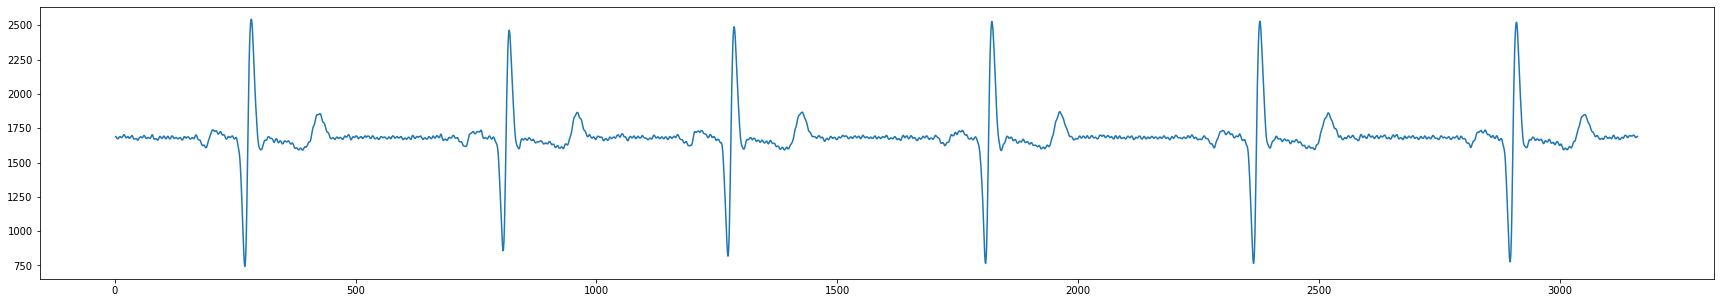

In [8]:
plt.figure(figsize=(30,5))
plt.plot(ECG[2:3162])
plt.show()

In [9]:
PPG = pd.read_csv('/home/user/conferences03/BIDMC PPG and Respiration Dataset/LZQ_PPG .txt',names=['q','G','a','PPG'])
PPG

,q,G,a,PPG
0,1593,1659,1654,10
1,1589,1654,1653,116000
2,1616,1652,1653,182357
3,1643,1653,1653,248101
4,1660,1655,1654,313658
...,...,...,...,...
32715,1633,1659,1654,459044
32716,1654,1653,1653,459061
32717,1669,1653,1651,459107
32718,1661,1654,1652,459234


In [10]:
PPG = PPG['PPG']
PPG =  pd.DataFrame(PPG[10:31620])
PPG

,PPG
10,407186
11,407253
12,407297
13,407410
14,407455
...,...
31615,433480
31616,433649
31617,433770
31618,433888


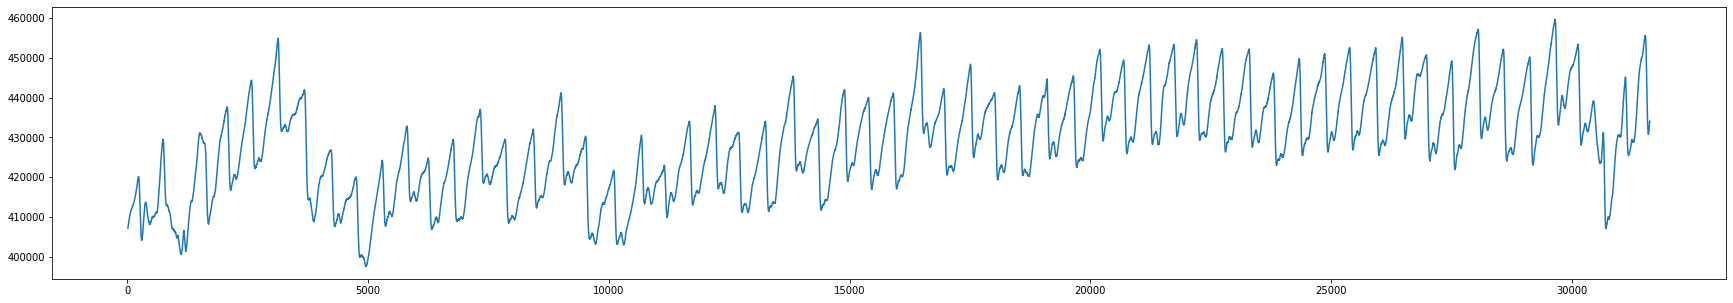

In [11]:
plt.figure(figsize=(30,5))
plt.plot(PPG[0:31620])
plt.show()

In [12]:
from scipy.signal import resample

# Assuming you have PPG and ECG signals as numpy arrays
# Replace these with your actual signals
ppg_signal = PPG.values
ecg_signal = ECG.values

# Define the original and target sampling rates
original_sampling_rate = 300  # Hz
target_sampling_rate = 125  # Hz

# Calculate the resampling factor
resampling_factor = original_sampling_rate / target_sampling_rate

# Calculate the number of samples in the resampled signal
num_samples_resampled = int(len(ppg_signal) / resampling_factor)

# Resample the PPG and ECG signals
resampled_ppg = resample(ppg_signal, num_samples_resampled)
resampled_ecg = resample(ecg_signal, num_samples_resampled)

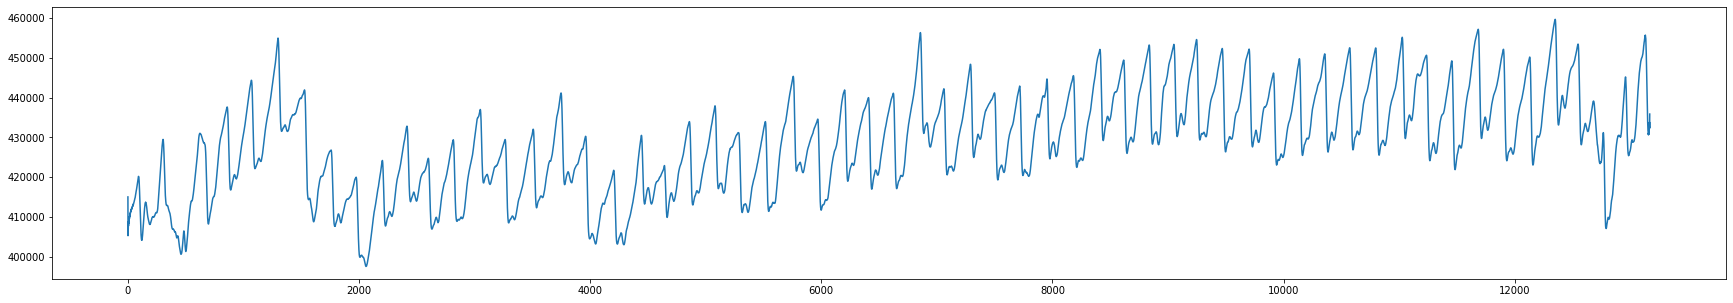

In [13]:
plt.figure(figsize=(30,5))
plt.plot(resampled_ppg)
plt.show()

In [14]:
chunk_size = 250

# Calculate the number of chunks
num_chunks = len(resampled_ppg) // chunk_size

# Split the signals into chunks
ppg_chunks = np.split(resampled_ppg[:num_chunks * chunk_size], num_chunks)
ecg_chunks = np.split(resampled_ecg[:num_chunks * chunk_size], num_chunks)


In [15]:
ppg_chunks

[array([[415064.99064719],
        [405318.67624965],
        [408665.10383948],
        [407021.37297705],
        [408596.2697778 ],
        [407767.11773837],
        [408875.71784459],
        [408358.39030223],
        [409192.84746276],
        [408798.80666724],
        [409514.48515727],
        [409237.34356876],
        [409816.23691501],
        [409587.91211039],
        [410157.44396967],
        [409967.42930259],
        [410437.67526958],
        [410286.39708235],
        [410708.20074512],
        [410567.06214599],
        [411002.95561306],
        [410884.19209014],
        [411254.4170347 ],
        [411182.99750144],
        [411462.51916234],
        [411382.82553607],
        [411691.48669792],
        [411613.17654553],
        [411842.6510857 ],
        [411795.27738543],
        [412012.68711431],
        [411917.99991008],
        [412148.61444447],
        [412026.54213308],
        [412262.77245161],
        [412192.97500528],
        [412381.64497556],
 

In [16]:
len(ecg_chunks)

52

In [17]:
ecg_chunks

[array([[1694.07859305],
        [1685.85430935],
        [1675.99165854],
        [1675.04597829],
        [1688.69717978],
        [1684.05093585],
        [1683.85642961],
        [1697.68803828],
        [1699.67834375],
        [1680.72034003],
        [1685.72685156],
        [1687.0571029 ],
        [1676.78154057],
        [1684.48397963],
        [1696.03700129],
        [1681.02457496],
        [1669.43489172],
        [1674.78877074],
        [1669.37453552],
        [1664.77449232],
        [1679.80243081],
        [1686.31220849],
        [1681.79272065],
        [1686.74193135],
        [1697.33449677],
        [1682.09764162],
        [1676.57606628],
        [1682.04475254],
        [1679.48403194],
        [1676.57886054],
        [1696.76287173],
        [1695.26497892],
        [1671.01013357],
        [1672.14744463],
        [1671.81256082],
        [1663.6842929 ],
        [1680.27453341],
        [1689.74777005],
        [1677.67263559],
        [1680.21298802],


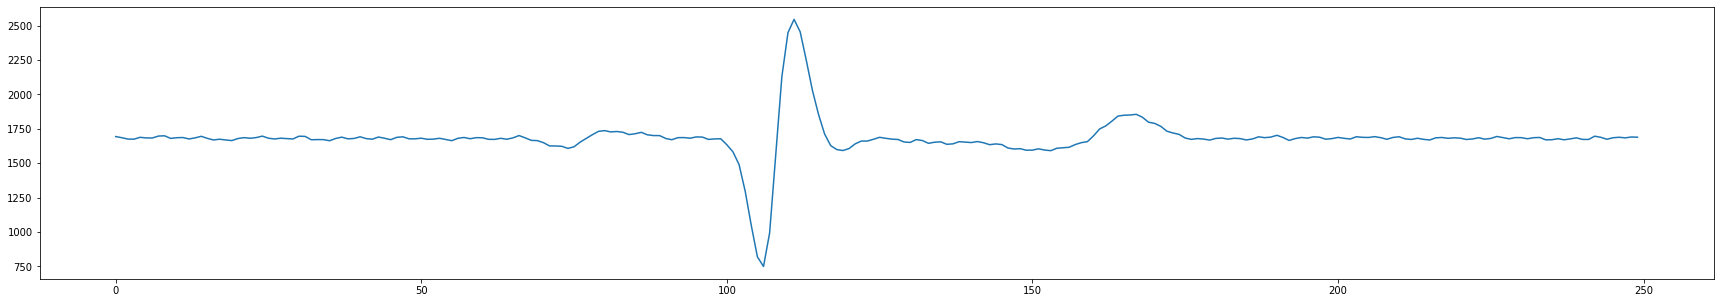

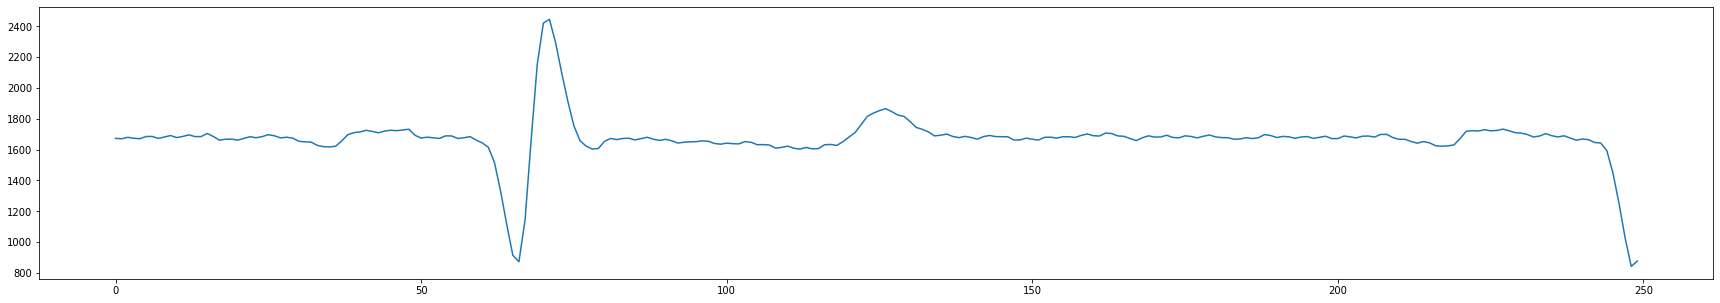

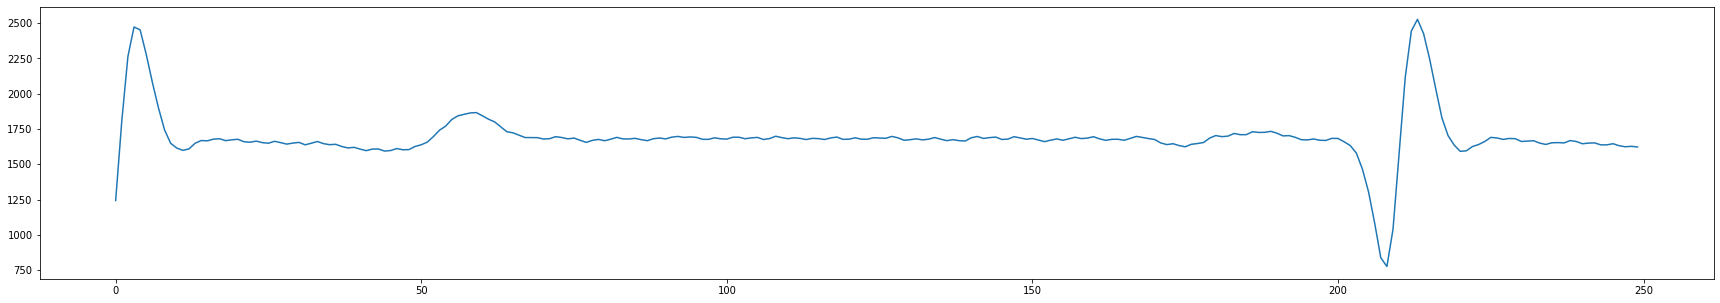

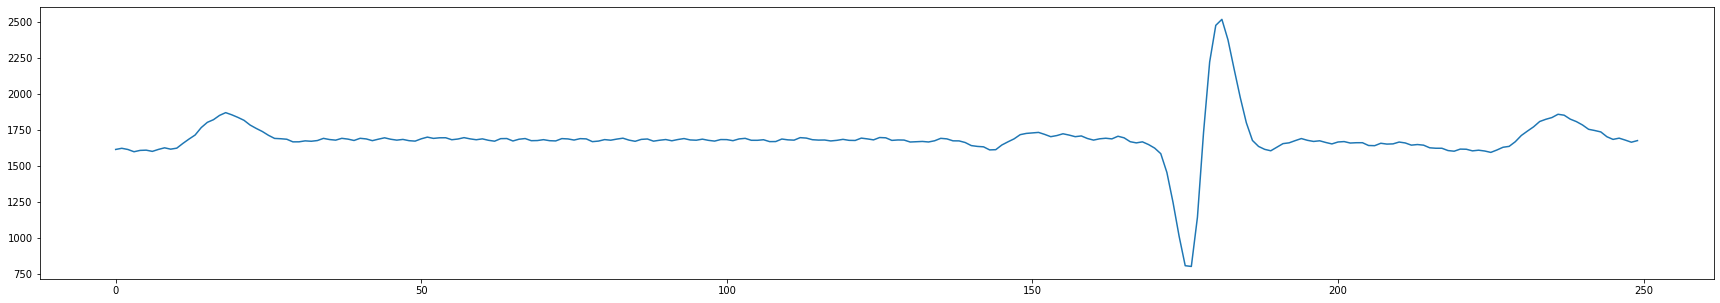

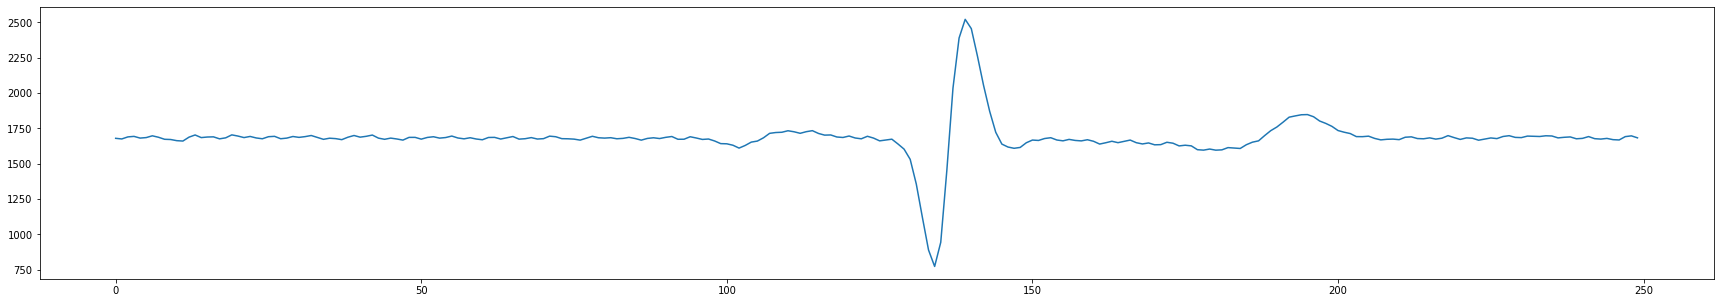

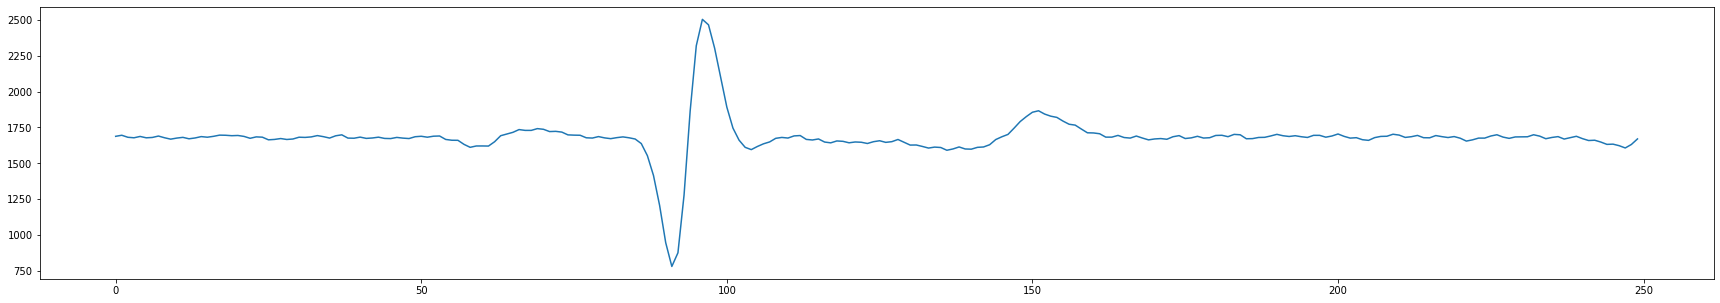

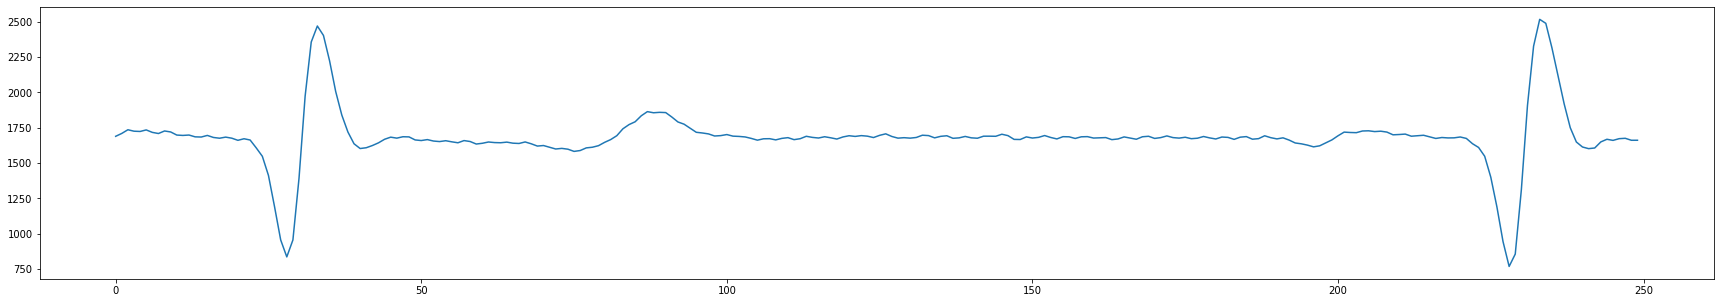

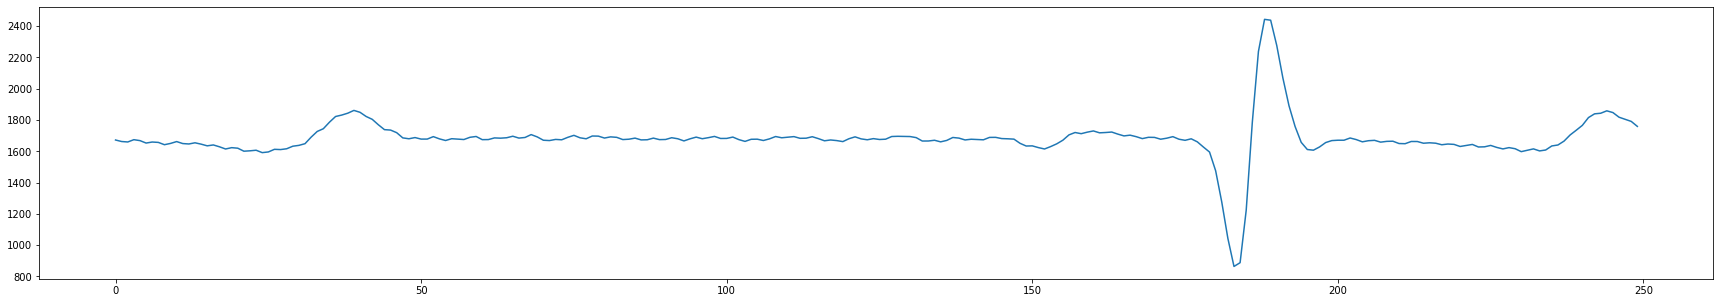

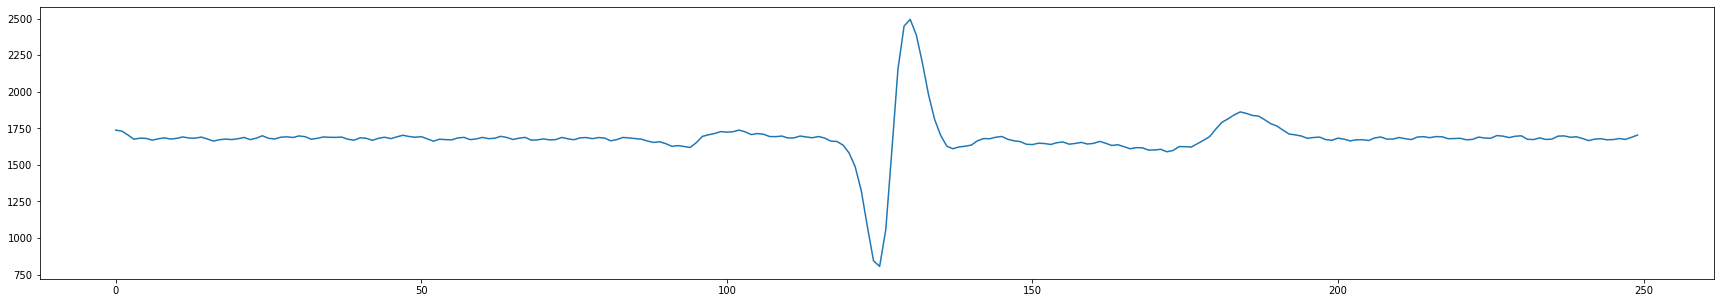

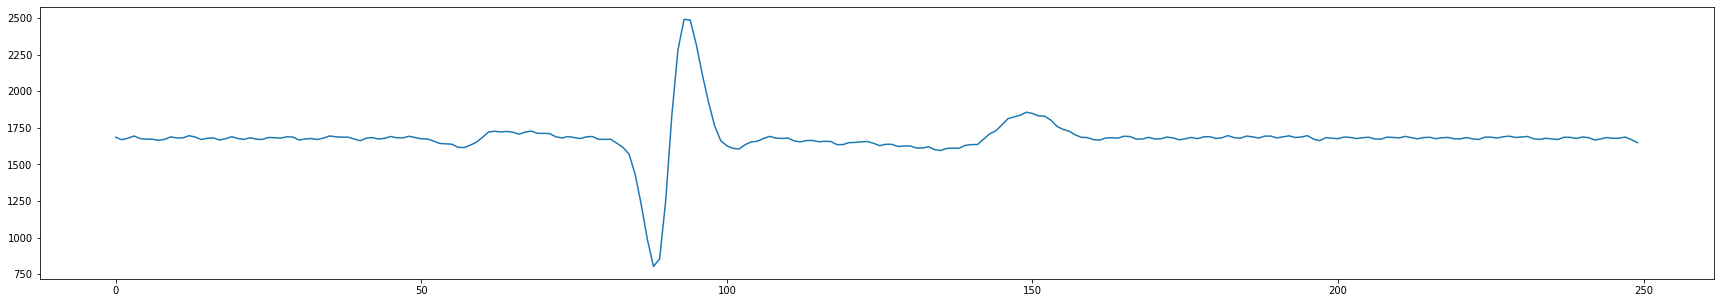

In [18]:
for i in range(0,10):
    plt.figure(figsize=(30,5))
    plt.plot(ecg_chunks[i])
    plt.show()

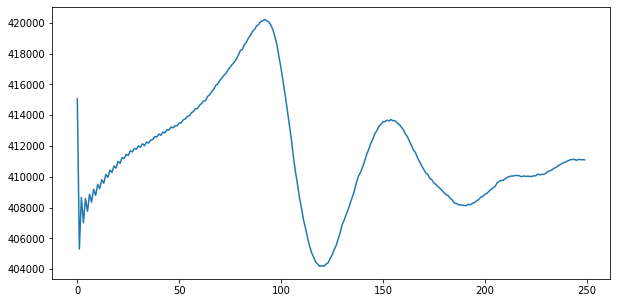

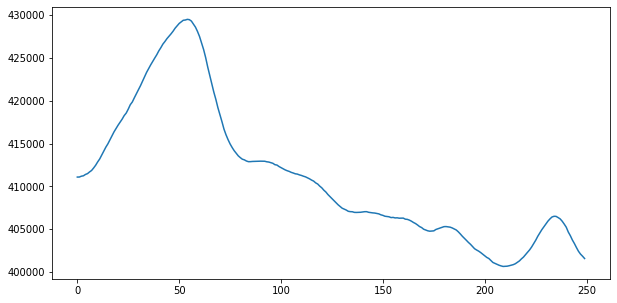

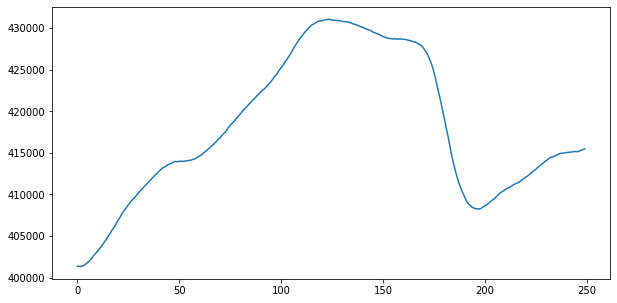

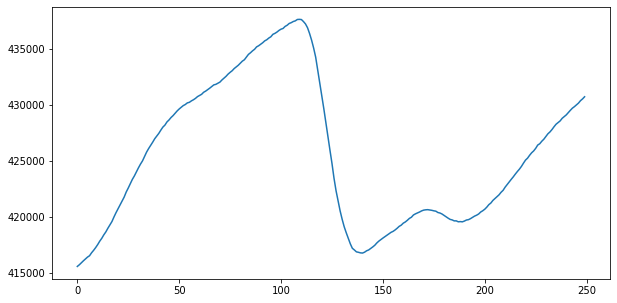

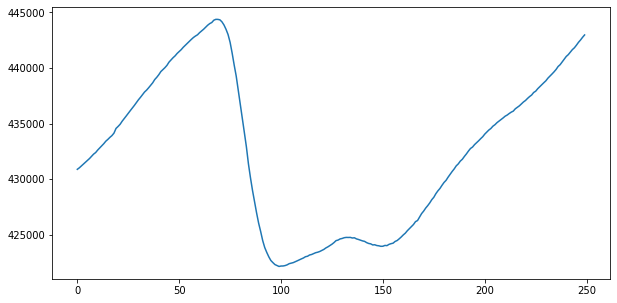

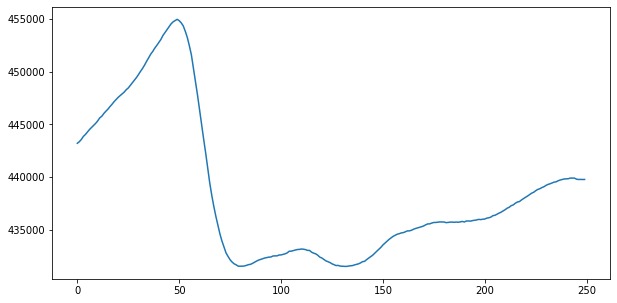

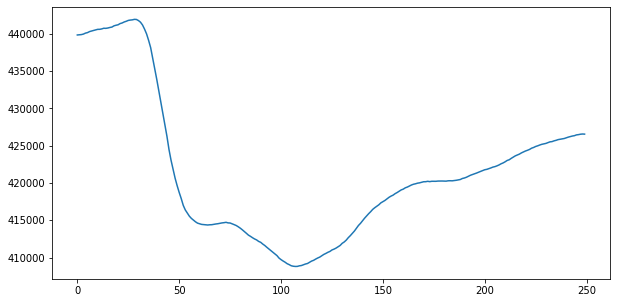

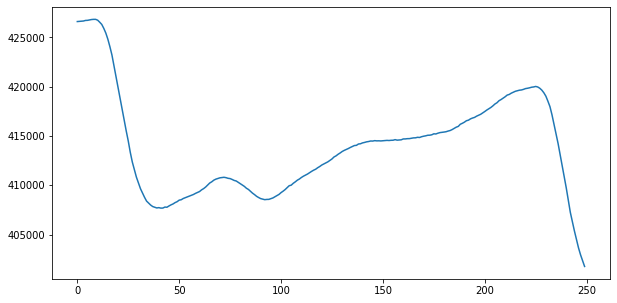

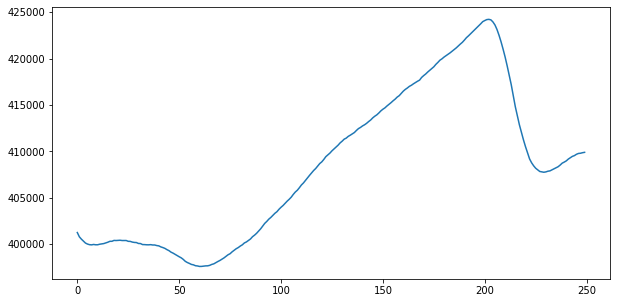

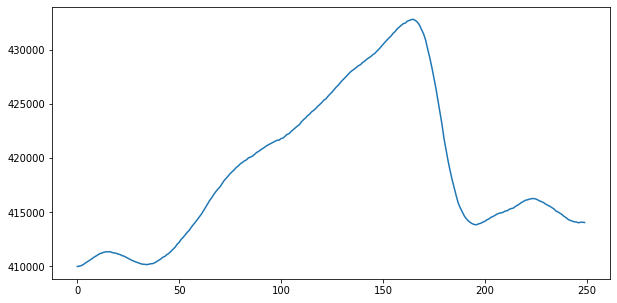

In [19]:
for i in range(0,10):
    plt.figure(figsize=(10,5))
    plt.plot(ppg_chunks[i])
    plt.show()

In [20]:
# ecg_data = np.array(ecg_chunks).reshape(32, 250)


In [21]:
# plt.plot(ecg_data[1])

In [22]:
import numpy as np
from scipy.signal import butter, lfilter

# Define the Butterworth bandpass filter function
def butter_bandpass_filter(data, lowcut, highcut, fs, order=2):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    y = lfilter(b, a, data)
    return y

# Assuming you have PPG and ECG chunks
# Replace these with your actual chunks


# Define filter parameters
lowcut = 0.9  # Lower cutoff frequency in Hz
highcut = 10.0  # Upper cutoff frequency in Hz
fs = 125.0  # Sampling frequency in Hz
order = 2  # Filter order

# Apply the Butterworth bandpass filter to each PPG and ECG chunk
filtered_ppg_chunks = [butter_bandpass_filter(chunk, lowcut, highcut, fs, order) for chunk in ppg_chunks]
filtered_ecg_chunks = [butter_bandpass_filter(chunk, lowcut, highcut, fs, order) for chunk in ecg_chunks]


In [23]:
from sklearn.preprocessing import StandardScaler



# Initialize StandardScaler
scaler_ppg = StandardScaler()
scaler_ecg = StandardScaler()

# Reshape the chunks to 2D arrays (n_samples, n_features)
reshaped_ppg_chunks = np.array([chunk.flatten() for chunk in filtered_ppg_chunks])
reshaped_ecg_chunks = np.array([chunk.flatten() for chunk in filtered_ecg_chunks])

# Fit and transform the PPG data
scaled_ppg_chunks = scaler_ppg.fit_transform(reshaped_ppg_chunks)

# Fit and transform the ECG data
scaled_ecg_chunks = scaler_ecg.fit_transform(reshaped_ecg_chunks)

# Reshape the scaled data back to 3D arrays
scaled_ppg_chunks = [scaled_ppg_chunks[i].reshape(filtered_ppg_chunks[i].shape) for i in range(len(filtered_ppg_chunks))]
scaled_ecg_chunks = [scaled_ecg_chunks[i].reshape(filtered_ecg_chunks[i].shape) for i in range(len(filtered_ecg_chunks))]


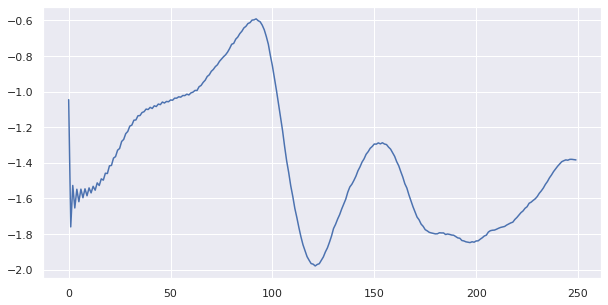

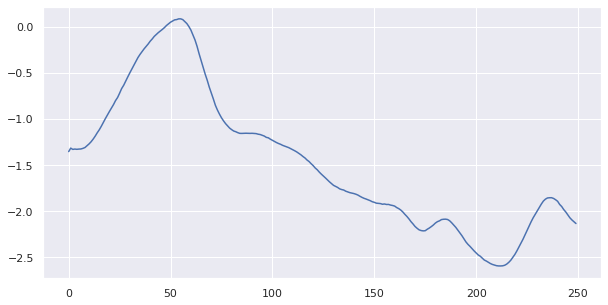

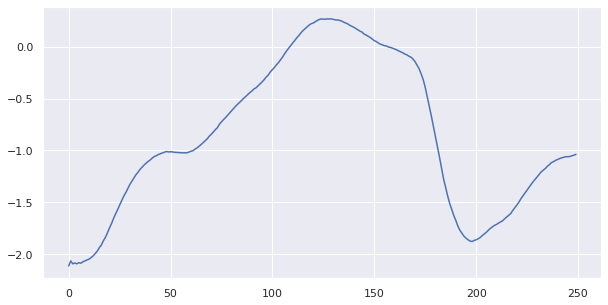

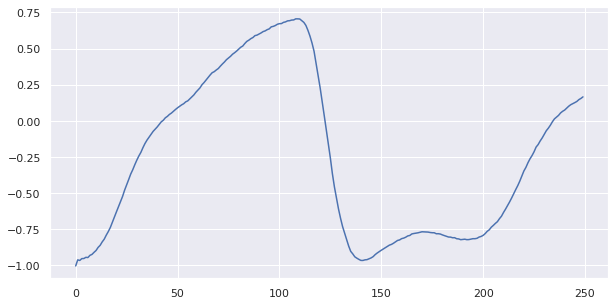

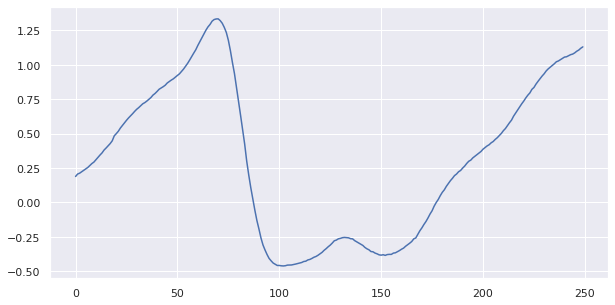

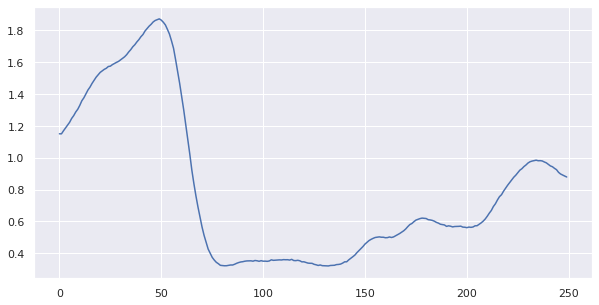

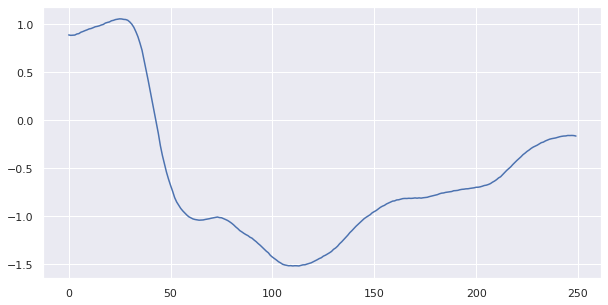

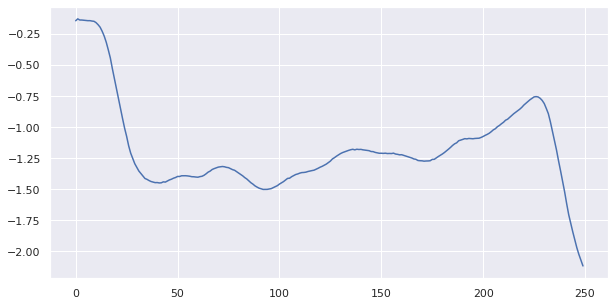

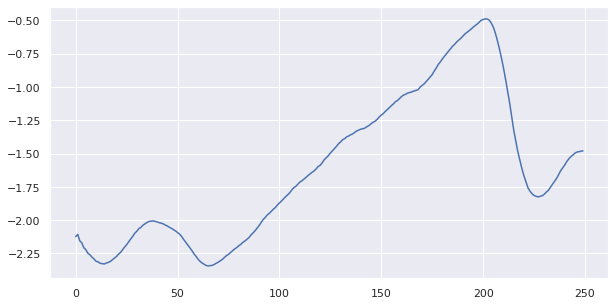

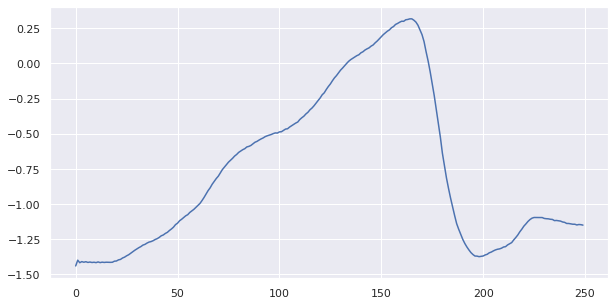

In [96]:
for i in range(0,10):
    plt.figure(figsize=(10,5))
    plt.plot(scaled_ppg_chunks[i])
    plt.show()

In [97]:
data_total = np.concatenate((scaled_ecg_chunks,scaled_ppg_chunks),axis=1)
data_total.shape

(52, 500, 1)

In [98]:
from keras import models    
model = models.load_model('/home/user/PycharmProjects/SE-Net/Dataset/1SENet_x20_128.h5')

In [99]:
pre1, yhat1, yhat2  = model.predict(data_total)

2/2 [==============================] - 0s 19ms/step


In [100]:
SBP =[]
DBP = []

for i in range(0,51):

    max_value = max(pre1[i])
    min_value = min(pre1[i])
    
    DBP.append(min_value)
    SBP.append(max_value)

In [101]:
yhat1 = DBP
yhat2 = SBP

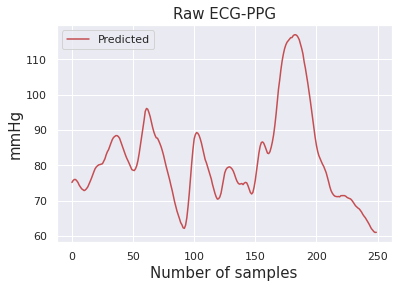

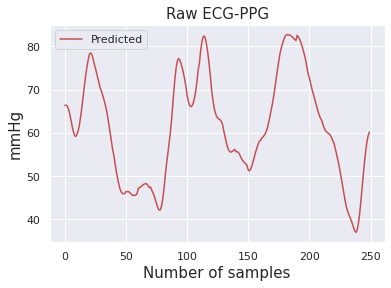

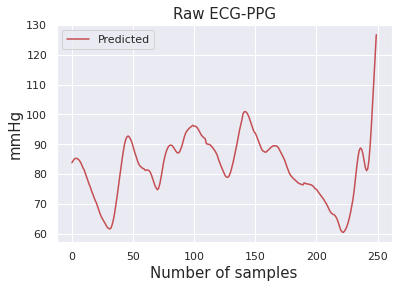

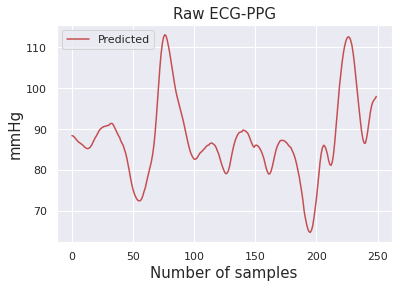

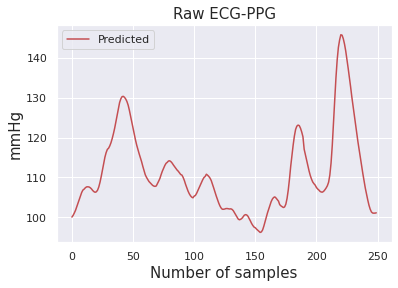

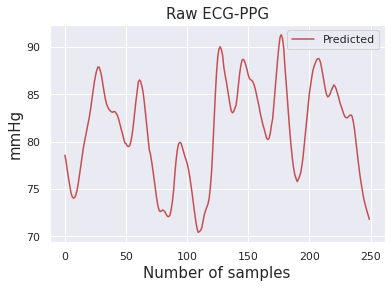

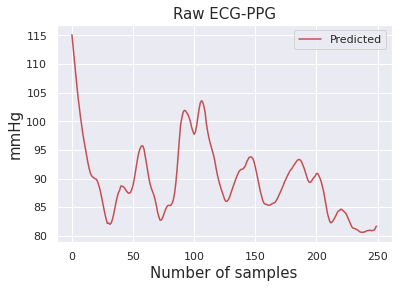

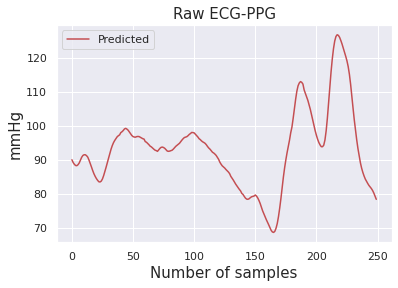

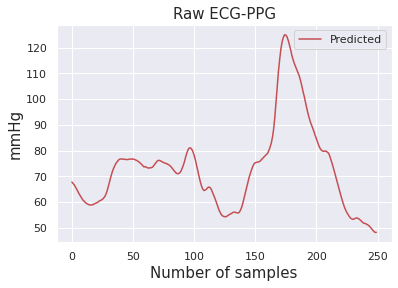

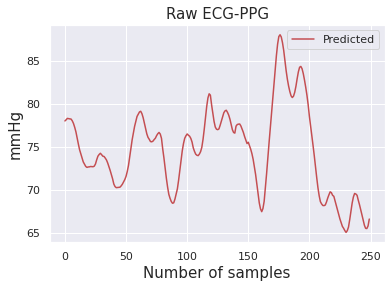

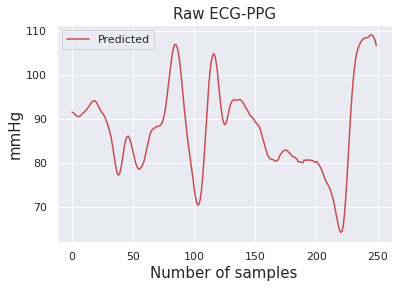

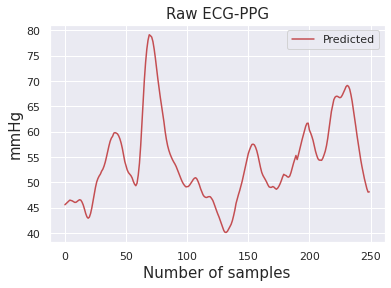

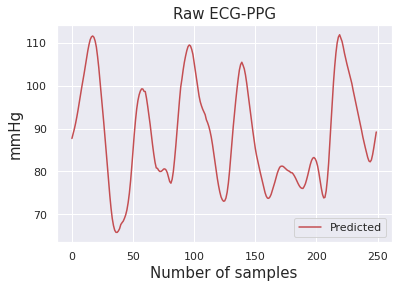

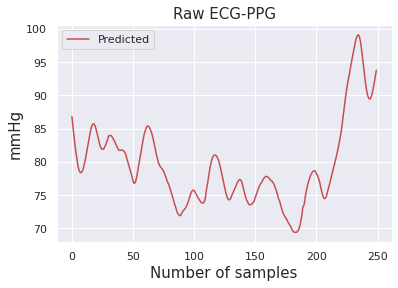

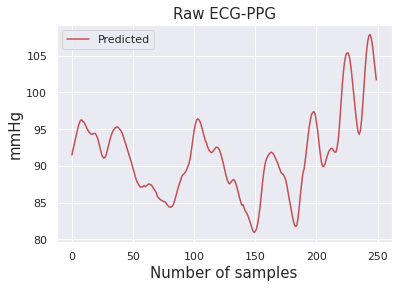

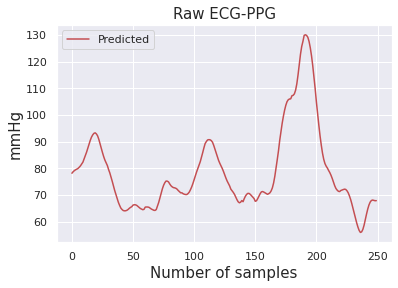

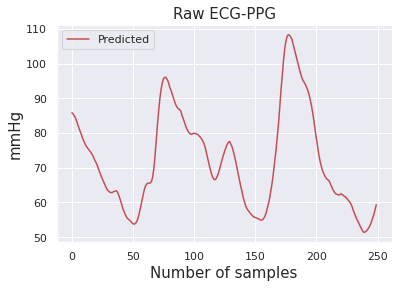

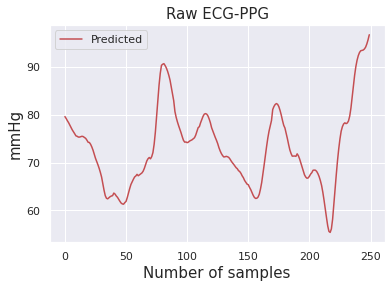

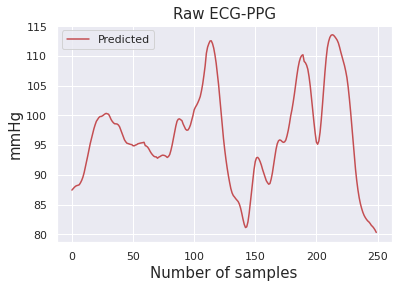

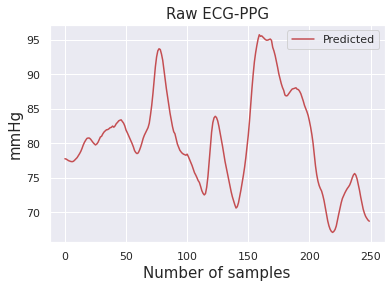

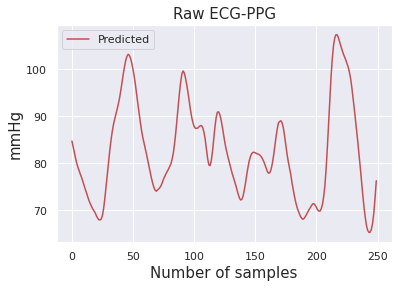

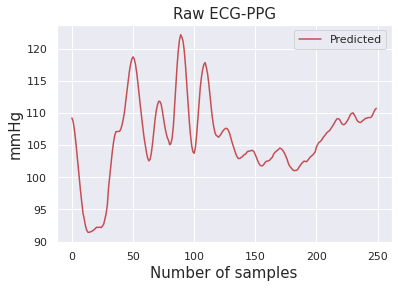

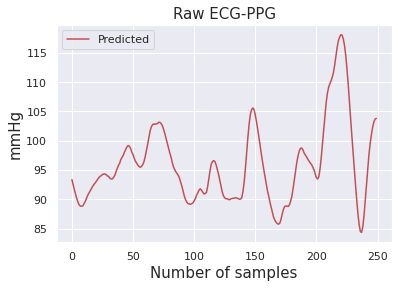

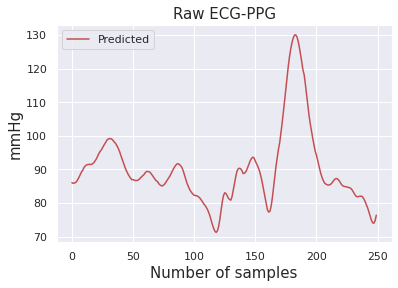

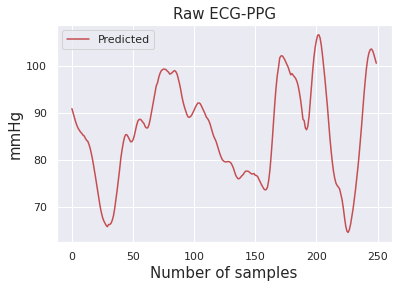

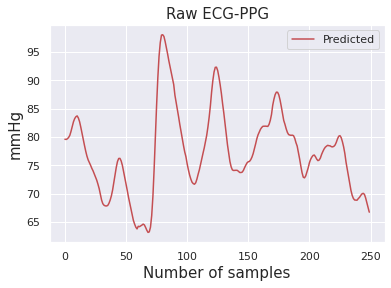

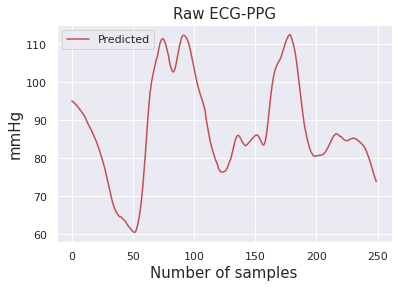

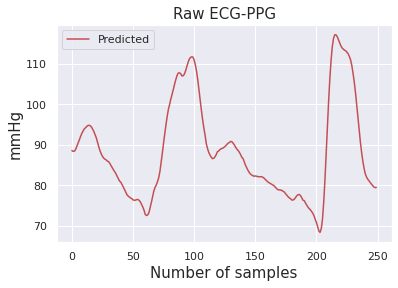

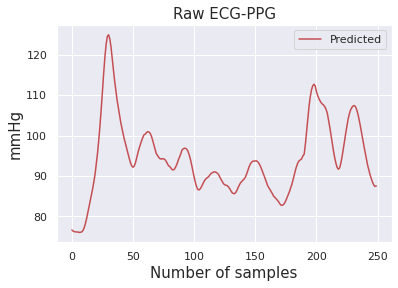

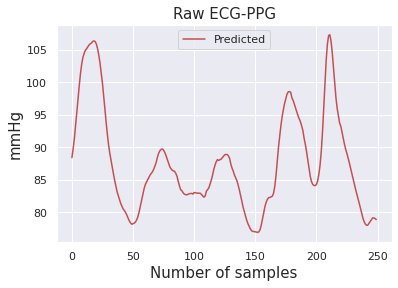

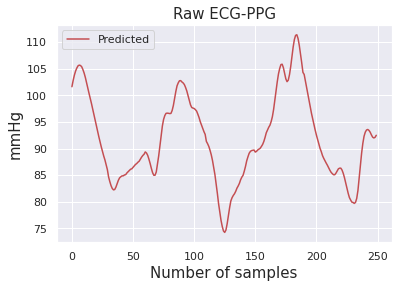

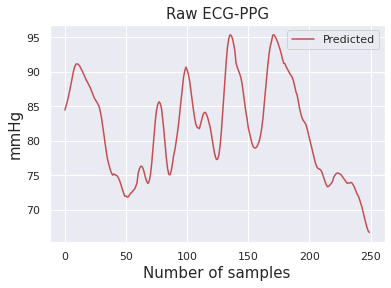

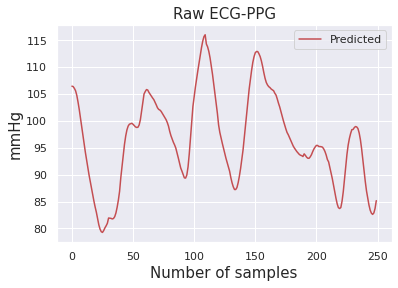

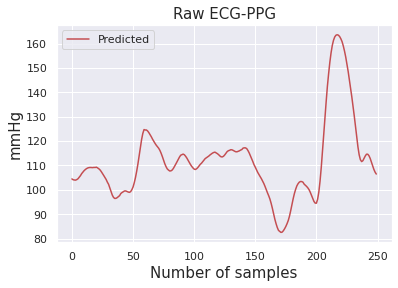

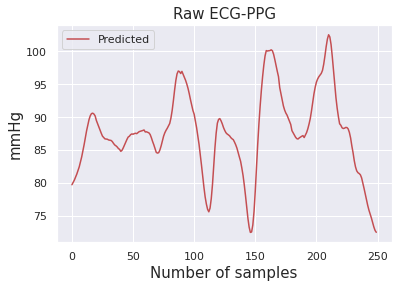

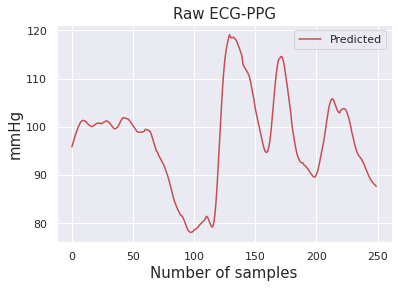

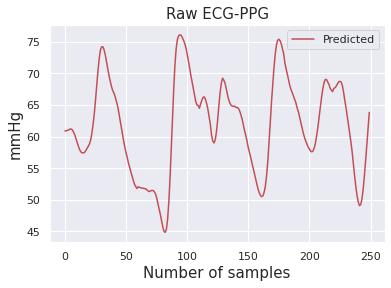

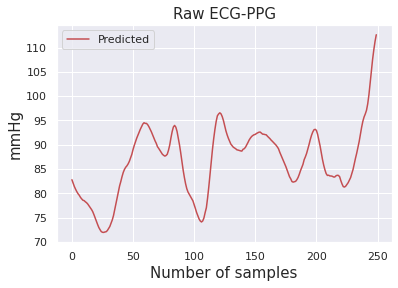

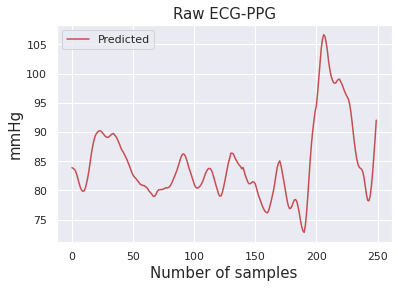

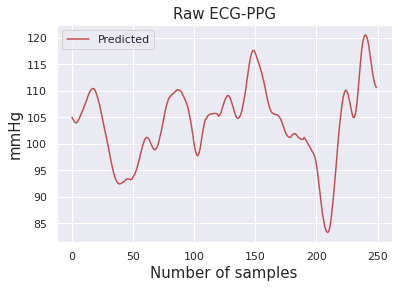

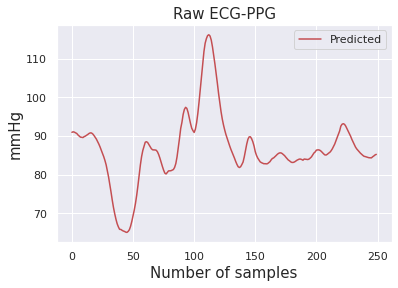

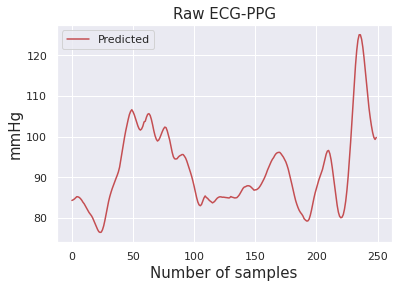

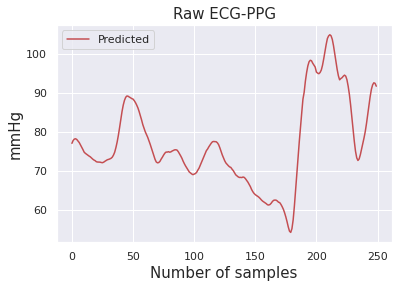

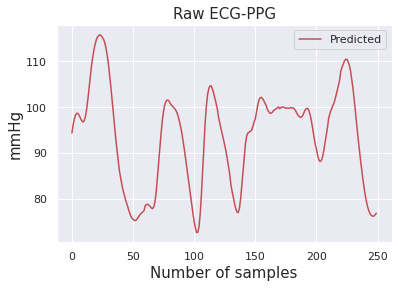

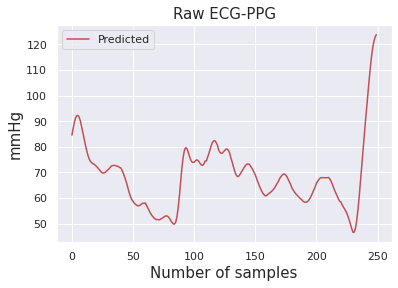

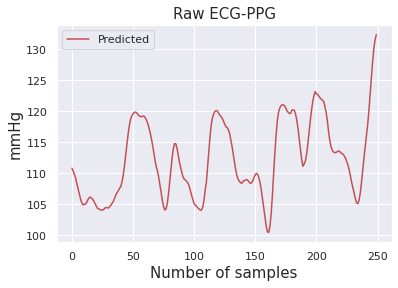

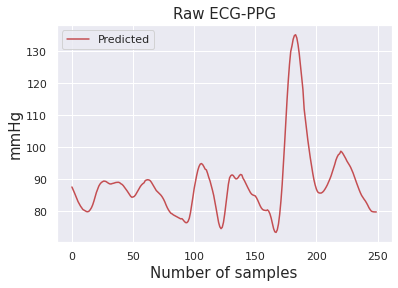

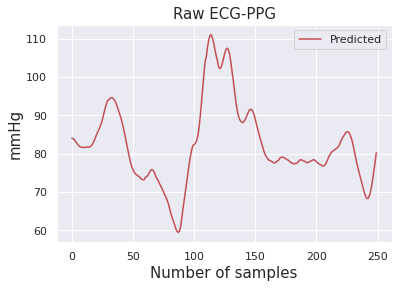

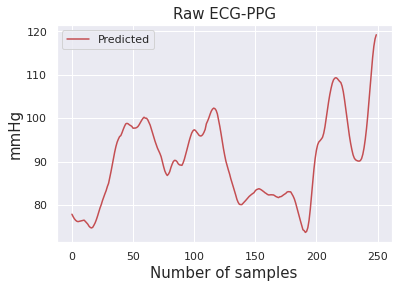

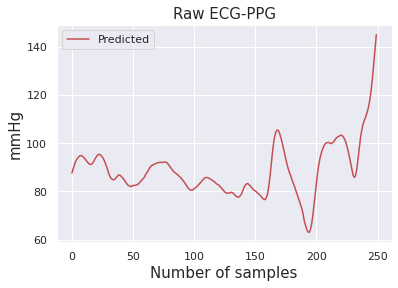

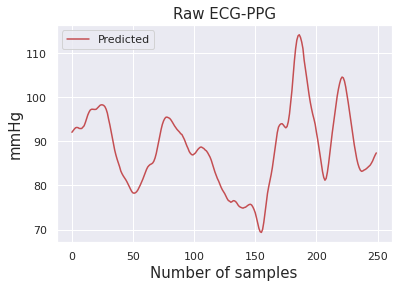

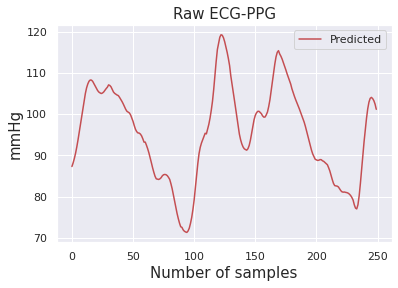

In [102]:
for i in range(0,len(pre1)):
    plt.title('Raw ECG-PPG',fontsize=15)
    # plt.plot(pre1[3],'r',label='True')
    plt.plot(pre1[i],'r', label='Predicted')
    plt.legend()
    plt.xlabel('Number of samples',fontsize=15)
    plt.ylabel('mmHg',fontsize=15)
    plt.show()
    

In [103]:
yhat1

[60.970966,
 37.01414,
 60.41629,
 64.768234,
 96.23563,
 70.40468,
 80.58689,
 68.65242,
 48.23728,
 65.02624,
 64.13288,
 40.147797,
 65.7436,
 69.40586,
 80.957214,
 55.99484,
 51.371548,
 55.40942,
 80.31782,
 67.11102,
 65.3023,
 91.41751,
 84.34786,
 71.24545,
 64.46704,
 63.128677,
 60.515633,
 68.322914,
 76.006775,
 76.91872,
 74.24497,
 66.73631,
 79.259796,
 82.53631,
 72.47876,
 78.13333,
 44.824886,
 71.94302,
 72.80221,
 83.308304,
 65.04511,
 76.44527,
 54.15689,
 72.72598,
 46.568718,
 100.480286,
 73.42235,
 59.464424,
 73.72403,
 62.998596,
 69.35086]

In [104]:

y_valid = np.random.randint(73,85,(51,1))

z_valid = np.random.randint(118,120,(51,1))

In [105]:
yhat1

[60.970966,
 37.01414,
 60.41629,
 64.768234,
 96.23563,
 70.40468,
 80.58689,
 68.65242,
 48.23728,
 65.02624,
 64.13288,
 40.147797,
 65.7436,
 69.40586,
 80.957214,
 55.99484,
 51.371548,
 55.40942,
 80.31782,
 67.11102,
 65.3023,
 91.41751,
 84.34786,
 71.24545,
 64.46704,
 63.128677,
 60.515633,
 68.322914,
 76.006775,
 76.91872,
 74.24497,
 66.73631,
 79.259796,
 82.53631,
 72.47876,
 78.13333,
 44.824886,
 71.94302,
 72.80221,
 83.308304,
 65.04511,
 76.44527,
 54.15689,
 72.72598,
 46.568718,
 100.480286,
 73.42235,
 59.464424,
 73.72403,
 62.998596,
 69.35086]

In [106]:
yhat2

[116.91346,
 82.68914,
 126.70573,
 113.09557,
 145.75157,
 91.30968,
 115.12494,
 126.718185,
 124.97833,
 88.065384,
 109.09113,
 79.16212,
 111.92912,
 99.12964,
 107.85819,
 130.02902,
 108.29917,
 96.73405,
 113.57799,
 95.70429,
 107.39607,
 122.18362,
 118.108765,
 130.11757,
 106.70867,
 98.06974,
 112.530655,
 117.25184,
 124.94836,
 107.30295,
 111.36688,
 95.37952,
 116.02651,
 163.61693,
 102.529976,
 119.10119,
 76.13338,
 112.639656,
 106.65778,
 120.60435,
 116.17438,
 125.0644,
 104.958565,
 115.80163,
 123.766235,
 132.35648,
 135.22119,
 110.97918,
 119.177864,
 144.98514,
 114.20351]

In [107]:

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score

In [108]:
print('R²: ', r2_score(y_valid, yhat1))
print('MAE: ', mean_absolute_error(y_valid, yhat1))
print('RMSE: ', mean_squared_error(y_valid, yhat1, squared=False))


R²:  -30.967834448866565
MAE:  14.41637061623966
RMSE:  17.962535126923086


In [109]:
#DBP
print('R²: ', r2_score(z_valid, yhat2))
print('MAE: ', mean_absolute_error(z_valid, yhat2))
print('RMSE: ', mean_squared_error(z_valid, yhat2, squared=False))


R²:  -1173.7981462175433
MAE:  12.674953385895373
RMSE:  16.975469300511932


In [110]:
import seaborn as sns
sns.set()

In [111]:
BPclass = np.zeros(4)
def classify_BP( prediction):

    if (prediction < 5):
        BPclass[0] += 1
    elif (prediction < 10):
        BPclass[1] += 1
    elif (prediction < 15):
        BPclass[2] += 1
    else:
        BPclass[3] += 1

def compute(yTest,yPred):
    # Split dataset into training set and test set in case use the same data for trainning and test
    import math
    Test = []
    Pred = []
    
    band = []
    for i in yTest:
        Test.append(i)
    for i in yPred:
        Pred.append(i)

    # print("list:",Test)
    # print("list:%.2f", Pred)
    erro, std = 0, []
    for i in range(0, yPred.shape[0]):
        # print("yPred: %.3f"%(Pred[i]), "| yTest: %.3f" %(Test[i])," | Erro: %.3f" %(np.abs(Pred[i] - Test[i])))
        # time.sleep(1)
        erro += abs(Pred[i] - Test[i])
        std.append(abs(Pred[i] - Test[i]))
        classify_BP(abs(Pred[i] - Test[i]))
        band.append(Pred[i] - Test[i])
        
        
        
        
        
    fig = plt.figure(figsize=(15, 4), dpi=120)
    ax1 = plt.subplot(1, 3, 1)
#     ax2 = ax1.twinx()
    sns.distplot(band, bins=100, kde=False, rug=False, ax=ax1)
#     sns.distplot(band, bins=100, kde=False, rug=False, ax=ax2)
#     ax2.set_yticklabels(['0 \%', '10 \%', '14.67 \%',
#                      '22.01 \%', '29.35 \%', '36.68 \%', '44.02 \%'])
    ax1.set_xlabel('Error (mmHg)', fontsize=14)
    ax1.set_ylabel('Number of Samples', fontsize=14)
#     ax2.set_ylabel('Percentage of Samples', fontsize=14)
    plt.title('Error in DBP Prediction', fontsize=18)
    plt.xlim(xmax=30.0, xmin=-30.0)
    #plt.xticks(np.arange(0, 60+1, 5))
    plt.tight_layout()


    print("Number of test: %d" % (sum(BPclass)))
    print("Mean Error: %.3f" % (erro / yPred.shape[0]))
    print("Standar Deviation NP: %.3f" % (np.std(std)))
    print("Classe 5mmHg: %d " % (BPclass[0]), "-> %.2f" % (BPclass[0] / (sum(BPclass)) * 100), "%")
    print("Classe 10mmHg: %d " % (BPclass[1]), "-> %.2f" % (BPclass[1] / (sum(BPclass)) * 100), "%",
          " %.2f" % ((BPclass[0] + BPclass[1]) / (sum(BPclass)) * 100), "%")
    print("Classe 15mmHg: %d " % (BPclass[2]), "-> %.2f" % (BPclass[2] / (sum(BPclass)) * 100), "%",
          " %.2f" % ((BPclass[0] + BPclass[1] + BPclass[2]) / (sum(BPclass)) * 100), "%")
    print("Classe >15mmHg: %d " % (BPclass[3]), "-> %.2f" % (BPclass[3] / (sum(BPclass)) * 100), "%")
    # print(" ------- END OF ANALYSIS ------")


In [112]:
def compute1(yTest,yPred):
    # Split dataset into training set and test set in case use the same data for trainning and test
    import math
    Test = []
    Pred = []
    
    band = []
    for i in yTest:
        Test.append(i)
    for i in yPred:
        Pred.append(i)

    # print("list:",Test)
    # print("list:%.2f", Pred)
    erro, std = 0, []
    for i in range(0, yPred.shape[0]):
        # print("yPred: %.3f"%(Pred[i]), "| yTest: %.3f" %(Test[i])," | Erro: %.3f" %(np.abs(Pred[i] - Test[i])))
        # time.sleep(1)
        erro += abs(Pred[i] - Test[i])
        std.append(abs(Pred[i] - Test[i]))
        classify_BP(abs(Pred[i] - Test[i]))
        band.append(Pred[i] - Test[i])
        
        
        
        
        
    fig = plt.figure(figsize=(15, 4), dpi=120)
    ax1 = plt.subplot(1, 3, 1)
#     ax2 = ax1.twinx()
    sns.distplot(band, bins=100, kde=False, rug=False, ax=ax1)
#     sns.distplot(band, bins=100, kde=False, rug=False, ax=ax2)
#     ax2.set_yticklabels(['0 \%', '10 \%', '14.67 \%',
#                      '22.01 \%', '29.35 \%', '36.68 \%', '44.02 \%'])
    ax1.set_xlabel('Error (mmHg)', fontsize=14)
    ax1.set_ylabel('Number of Samples', fontsize=14)
#     ax2.set_ylabel('Percentage of Samples', fontsize=14)
    plt.title('Error in DBP Prediction', fontsize=18)
    plt.xlim(xmax=30.0, xmin=-30.0)
    #plt.xticks(np.arange(0, 60+1, 5))
    plt.tight_layout()


    print("Number of test: %d" % (sum(BPclass)))
    print("Mean Error: %.3f" % (erro / yPred.shape[0]))
    print("Standar Deviation NP: %.3f" % (np.std(std)))
    print("Classe 5mmHg: %d " % (BPclass[0]), "-> %.2f" % (BPclass[0] / (sum(BPclass)) * 100), "%")
    print("Classe 10mmHg: %d " % (BPclass[1]), "-> %.2f" % (BPclass[1] / (sum(BPclass)) * 100), "%",
          " %.2f" % ((BPclass[0] + BPclass[1]) / (sum(BPclass)) * 100), "%")
    print("Classe 15mmHg: %d " % (BPclass[2]), "-> %.2f" % (BPclass[2] / (sum(BPclass)) * 100), "%",
          " %.2f" % ((BPclass[0] + BPclass[1] + BPclass[2]) / (sum(BPclass)) * 100), "%")
    print("Classe >15mmHg: %d " % (BPclass[3]), "-> %.2f" % (BPclass[3] / (sum(BPclass)) * 100), "%")
    # print(" ------- END OF ANALYSIS ------")


/home/user/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/tmp/ipykernel_61760/2706596311.py:57: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Mean Error: %.3f" % (erro / yPred.shape[0]))


Number of test: 51
Mean Error: 12.675
Standar Deviation NP: 11.292
Classe 5mmHg: 14  -> 27.45 %
Classe 10mmHg: 13  -> 25.49 %  52.94 %
Classe 15mmHg: 9  -> 17.65 %  70.59 %
Classe >15mmHg: 15  -> 29.41 %


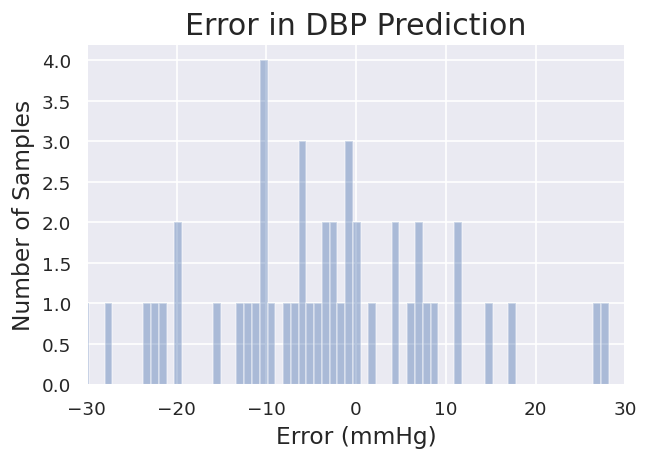

In [113]:
compute(z_valid, np.array(yhat2))

Number of test: 102
Mean Error: 14.416
Standar Deviation NP: 10.715
Classe 5mmHg: 26  -> 25.49 %
Classe 10mmHg: 18  -> 17.65 %  43.14 %
Classe 15mmHg: 20  -> 19.61 %  62.75 %
Classe >15mmHg: 38  -> 37.25 %


/tmp/ipykernel_61760/3475154761.py:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Mean Error: %.3f" % (erro / yPred.shape[0]))


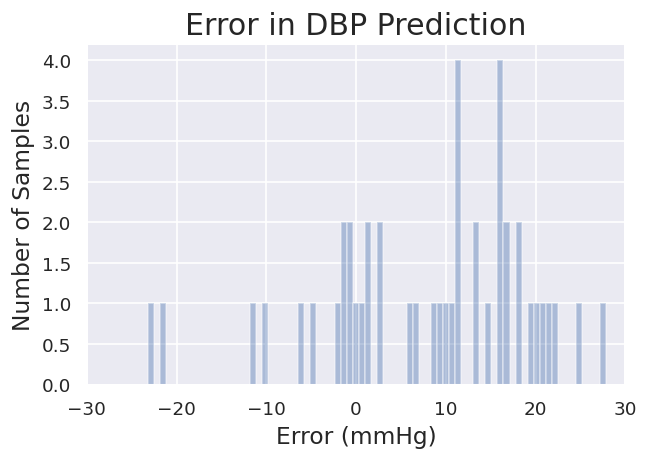

In [114]:
 compute1(yhat1, np.array(y_valid))

In [115]:
yhat1

[60.970966,
 37.01414,
 60.41629,
 64.768234,
 96.23563,
 70.40468,
 80.58689,
 68.65242,
 48.23728,
 65.02624,
 64.13288,
 40.147797,
 65.7436,
 69.40586,
 80.957214,
 55.99484,
 51.371548,
 55.40942,
 80.31782,
 67.11102,
 65.3023,
 91.41751,
 84.34786,
 71.24545,
 64.46704,
 63.128677,
 60.515633,
 68.322914,
 76.006775,
 76.91872,
 74.24497,
 66.73631,
 79.259796,
 82.53631,
 72.47876,
 78.13333,
 44.824886,
 71.94302,
 72.80221,
 83.308304,
 65.04511,
 76.44527,
 54.15689,
 72.72598,
 46.568718,
 100.480286,
 73.42235,
 59.464424,
 73.72403,
 62.998596,
 69.35086]

In [116]:
y_valid  = pd.DataFrame(y_valid)
z_valid  = pd.DataFrame(z_valid)

In [117]:
def bland_altman_plot_SBP(data1, data2):
    data1     = np.asarray(data1)
    data2     = np.asarray(data2)
    mean      = np.mean([data1, data2], axis=1)
    diff      = data1 - data2                   # Difference between data1 and data2
    md        = np.mean(diff)                   # Mean of the difference
    sd        = np.std(diff, axis=0)            # Standard deviation of the difference

    print('md: ', md)
    print('sd: ', sd)
    
    with plt.style.context(('ggplot')):
        
        plt.rcParams['font.serif'] = ['Times New Roman']
        plt.rcParams.update({'font.size':800})
        

        plt.scatter(mean, diff,  c='k', edgecolors='lightgrey')
        plt.axhline(md, color='gray', linestyle='--', label=f'Mean Diff')
        plt.text(160, md , f'Mean Diff : { "%.4f" % md}', fontsize=15)

        plt.axhline(md + 1.96*sd, color='r', linestyle='--',label='+ 1.96*SD')
        plt.text(160, md + 1.96*sd, f'+ 1.96*SD : {"%.4f" % (md + 1.96*sd)}', fontsize=15)
        plt.ylim(-30,30)
        plt.xlim(60, 200)
#         plt.title(' Diastolic Blood Pressure', fontsize=17)
        plt.title(' Systolic Blood Pressure', fontsize=17)
        plt.xlabel('Average of Target and Estimate(mmHg)', fontsize=15)
        plt.ylabel('Error(mmHg)', fontsize=15)
        plt.axhline(md - 1.96*sd, color='r', linestyle='--',label='- 1.96*SD')
        plt.text(160, md - 1.96*sd, f'- 1.96*SD : {"%.4f" % (md - 1.96*sd)}', fontsize=15)

        plt.show()

In [121]:
Ypred1 = yhat1

Ytrue = z_valid
Ypred = yhat2

Ytrue1 = y_valid.values


In [122]:
from plot import evaluate_BP_Classification
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from mpl_toolkits.axes_grid1 import make_axes_locatable

# evaluate_BP_Classification(z_valid, yhat2, yhat1, y_valid)

In [123]:
Ypred1 = yhat1

Ypred1

[60.970966,
 37.01414,
 60.41629,
 64.768234,
 96.23563,
 70.40468,
 80.58689,
 68.65242,
 48.23728,
 65.02624,
 64.13288,
 40.147797,
 65.7436,
 69.40586,
 80.957214,
 55.99484,
 51.371548,
 55.40942,
 80.31782,
 67.11102,
 65.3023,
 91.41751,
 84.34786,
 71.24545,
 64.46704,
 63.128677,
 60.515633,
 68.322914,
 76.006775,
 76.91872,
 74.24497,
 66.73631,
 79.259796,
 82.53631,
 72.47876,
 78.13333,
 44.824886,
 71.94302,
 72.80221,
 83.308304,
 65.04511,
 76.44527,
 54.15689,
 72.72598,
 46.568718,
 100.480286,
 73.42235,
 59.464424,
 73.72403,
 62.998596,
 69.35086]

DBPS Classification Accuracy
                  precision    recall  f1-score   support

    Hypertension    1.00000   0.92157   0.95918        51
    Normotension    0.00000   0.00000   0.00000         0
Pre-hypertension    0.00000   0.00000   0.00000         0

        accuracy                        0.92157        51
       macro avg    0.33333   0.30719   0.31973        51
    weighted avg    1.00000   0.92157   0.95918        51

SBPS Classification Accuracy
              precision    recall  f1-score   support

Normotension    1.00000   1.00000   1.00000        51

    accuracy                        1.00000        51
   macro avg    1.00000   1.00000   1.00000        51
weighted avg    1.00000   1.00000   1.00000        51



/home/user/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/tmp/ipykernel_61760/37167529.py:47: RuntimeWarning: invalid 

ValueError: The number of FixedLocator locations (1), usually from a call to set_ticks, does not match the number of ticklabels (3).

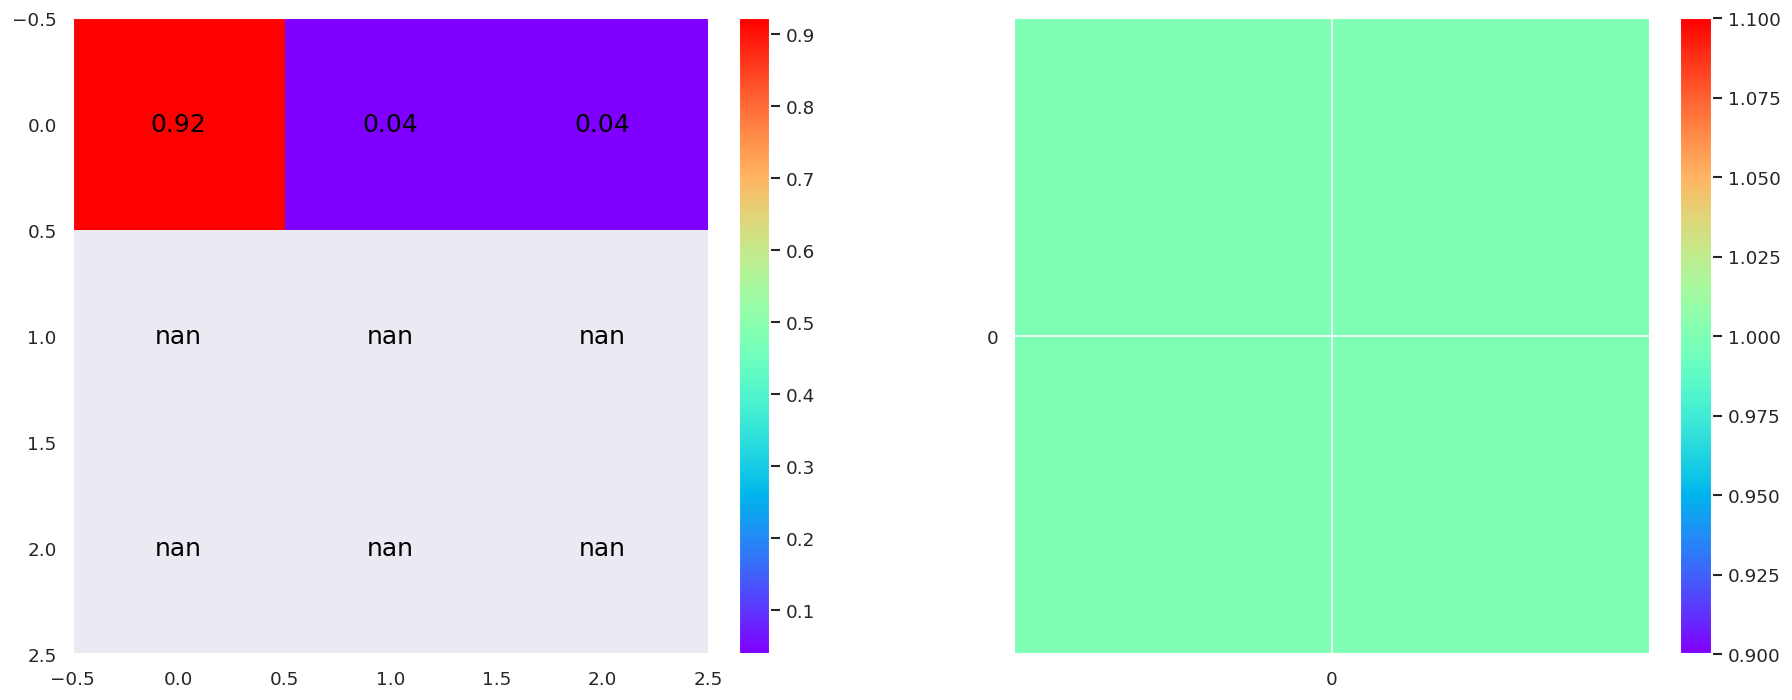

In [124]:
Ypred1 = yhat1

Ytrue = z_valid.values
Ypred = yhat2# loading prediction
#     Ytrue1 = y_valid.values
#     Ytrue1 = y_valid.values
#     Ypred1 = yhat1
Ytrue1 = y_valid.values

### DBPS ####

cls_gt = []
cls_pred = []

for i in (range(len(Ytrue))):
    dbp_gt = Ytrue[i].ravel()
    dbp_pred = Ypred[i].ravel()

    # 		dbp_gt = max_abp*min(y_t)+min_abp
    # 		dbp_pred = max_abp*min(y_p)+min_abp

    if (dbp_gt <= 80):
        cls_gt.append('Normotension')
    elif ((dbp_gt > 80) and (dbp_gt <= 90)).all():
        cls_gt.append('Pre-hypertension')
    elif (dbp_gt > 90).all():
        cls_gt.append('Hypertension')
    else:
        print('bump')  # this will never happen, check for error

    if (dbp_pred <= 80):
        cls_pred.append('Normotension')
    elif ((dbp_pred > 80) and (dbp_pred <= 90)):
        cls_pred.append('Pre-hypertension')
    elif (dbp_pred > 90):
        cls_pred.append('Hypertension')
    else:
        print('bump')  # this will never happen, check for error

print('DBPS Classification Accuracy')
print(classification_report(cls_gt, cls_pred, digits=5))
# print('-'*25)
# print(accuracy_score(cls_gt,cls_pred))

cm = confusion_matrix(cls_gt, cls_pred)
classes = ['Hypertension', 'Normotension', 'Prehypertension']
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig = plt.figure(figsize=(16, 6), dpi=120)
ax = plt.subplot(1, 2, 1)
im = ax.imshow(cm, interpolation='nearest', cmap="rainbow")  # draw confusion matrix

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.25)

ax.figure.colorbar(im, cax=cax)
# ax.set(xticks=np.arange(cm.shape[1]),
#        yticks=np.arange(cm.shape[0]),
#        xticklabels=classes, yticklabels=classes)

# ax.set_title('Blood Pressure Classification Accuracy Using DBP', fontsize=18)
# ax.set_ylabel('True label', fontsize=16)
# ax.set_xlabel('Predicted label', fontsize=16)

# plt.setp(ax.get_xticklabels(), rotation=45, fontsize=15, ha="right",
#          rotation_mode="anchor")

# plt.setp(ax.get_yticklabels(), fontsize=15)

fmt = '.2f'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center", fontsize=15,
                color="b" if cm[i, j] > thresh else "black")

ax.grid(False)

fig.tight_layout()


cls_gt = []
cls_pred = []

for i in (range(len(Ytrue))):
    sbp_gt = Ytrue1[i].ravel()
    sbp_pred = Ypred1[i].ravel()

    if (sbp_gt <= 120):
        cls_gt.append('Normotension')
    elif ((sbp_gt > 120) and (sbp_gt <= 140)):
        cls_gt.append('Prehypertension')
    elif (sbp_gt > 140):
        cls_gt.append('Hypertension')
    else:
        print('bump')  # this will never happen, check for error

    if (sbp_pred <= 120):
        cls_pred.append('Normotension')
    elif ((sbp_pred > 120) and (sbp_pred <= 140)):
        cls_pred.append('Prehypertension')
    elif (sbp_pred > 140):
        cls_pred.append('Hypertension')
    else:
        print('bump')  # this will never happen, check for error

print('SBPS Classification Accuracy')
print(classification_report(cls_gt, cls_pred, digits=5))
# print('-'*25)
# print(accuracy_score(cls_gt,cls_pred))

cm = confusion_matrix(cls_gt, cls_pred)
classes = ['Hypertension', 'Normotension', 'Prehypertension']
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

ax = plt.subplot(1, 2, 2)
im = ax.imshow(cm, interpolation='nearest', cmap="rainbow")  # draw confusion matrix

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.25)

ax.figure.colorbar(im, cax=cax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes, yticklabels=classes)

ax.set_title('Blood Pressure Classification Accuracy Using SBP', fontsize=18)
ax.set_ylabel('True label', fontsize=16)
ax.set_xlabel('Predicted label', fontsize=16)

plt.setp(ax.get_xticklabels(), rotation=45, fontsize=15, ha="right",
         rotation_mode="anchor")

plt.setp(ax.get_yticklabels(), fontsize=15)

fmt = '.2f'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center", fontsize=15,
                color="b" if cm[i, j] > thresh else "black")

ax.grid(False)

fig.tight_layout()

plt.show()
